In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-28 04:47:45.323981


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1171.5708)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 64


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5551)tensor(7.3587)tensor(5.1007)tensor(6.2414)tensor(4.8904)tensor(2.8925)tensor(4.4701)tensor(4.1037)tensor(6.5286)tensor(4.6591)tensor(4.3405)tensor(3.8424)tensor(9.4393)tensor(4.5292)tensor(5.5882)tensor(4.0295)tensor(6.3990)tensor(2.9444)tensor(6.1813)tensor(3.4591)tensor(3.4435)tensor(4.5114)tensor(8.3005)tensor(5.4922)tensor(5.1433)tensor(5.4709)tensor(6.5018)tensor(8.9497)tensor(3.9941)tensor(4.3565)tensor(5.9241)tensor(4.7804)tensor(3.6365)tensor(4.7080)tensor(8.0531)tensor(3.7576)tensor(6.6630)tensor(2.4981)tensor(4.5347)tensor(4.8187)tensor(3.8487)tensor(2.8303)tensor(3.2356)tensor(3.9831)tensor(3.3124)tensor(3.8845)tensor(6.3221)tensor(3.5978)tensor(5.7582)tensor(3.4766)tensor(4.8072)tensor(4.7992)tensor(2.6046)tensor(4.5801)tensor(6.9730)tensor(3.2442)tensor(4.5405)tensor(2.8318)tensor(8.8840)tensor(5.4158)tensor(7.0567)tensor(4.4412)tensor(3.1098)tensor(7.6374)tensor(4.0861)tensor(9.2423)tensor(6.2062)tensor(6.0323)tensor(3.6861)tensor(6.2504)tensor(6.2407)tensor

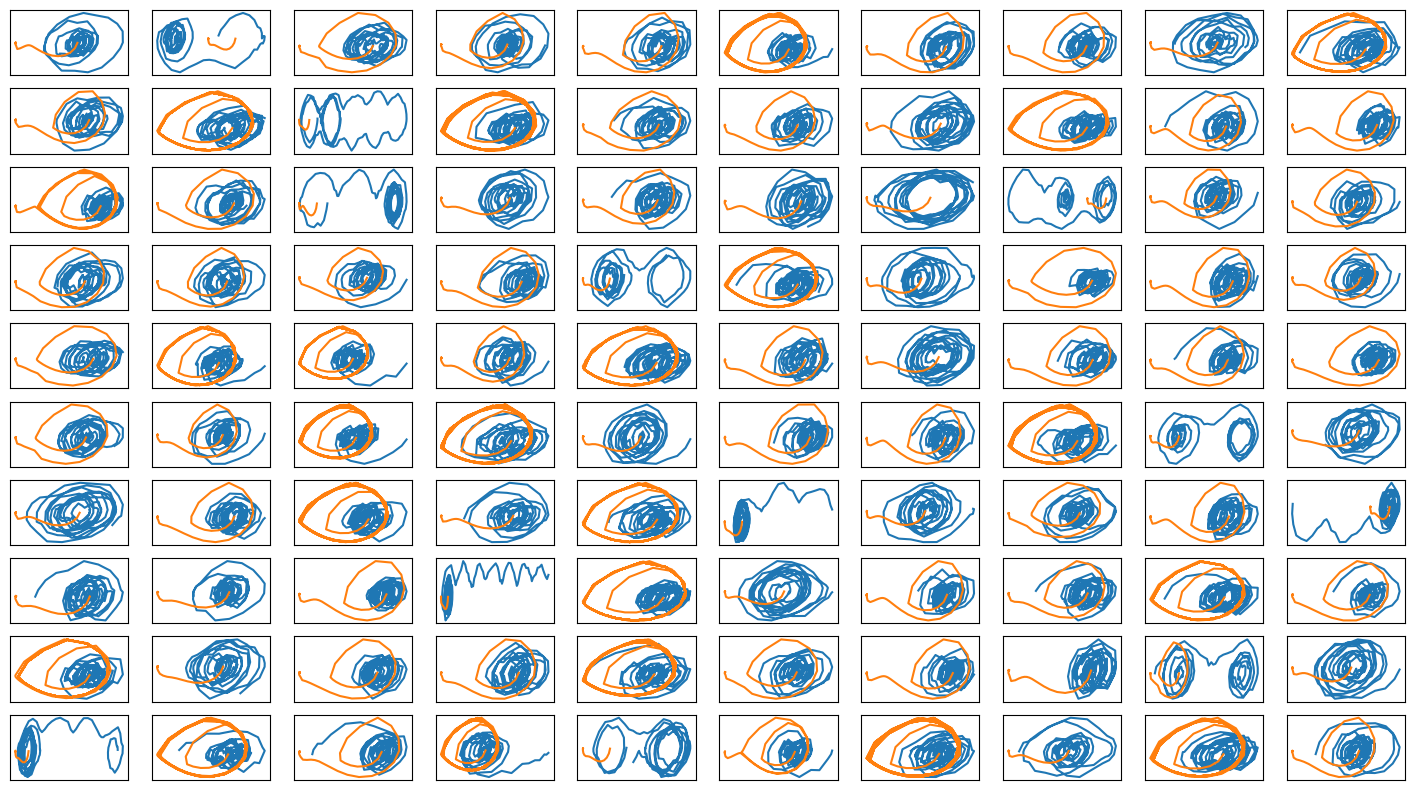

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 441.32112  validloss 1465.50586±0.00000  bestvalidloss 1465.50586  last_update 0
train: iter 1  trainloss 1135.03616  validloss 1158.69467±0.00000  bestvalidloss 1158.69467  last_update 0
train: iter 2  trainloss 395.13351  validloss 404.43276±0.00000  bestvalidloss 404.43276  last_update 0
train: iter 3  trainloss 106.76469  validloss 182.00507±0.00000  bestvalidloss 182.00507  last_update 0
train: iter 4  trainloss 7.71855  validloss 59.62495±0.00000  bestvalidloss 59.62495  last_update 0
train: iter 5  trainloss -37.76814  validloss -14.10740±0.00000  bestvalidloss -14.10740  last_update 0
train: iter 6  trainloss -121.26924  validloss -93.91772±0.00000  bestvalidloss -93.91772  last_update 0
train: iter 7  trainloss -160.42891  validloss -146.12274±0.00000  bestvalidloss -146.12274  last_update 0
train: iter 8  trainloss -197.86360  validloss -145.21100±0.00000  bestvalidloss -146.12274  last_update 1
train: iter 9  trainloss -208.76563  

train: iter 76  trainloss -597.18226  validloss -688.29642±0.00000  bestvalidloss -692.49418  last_update 3
train: iter 77  trainloss -612.81020  validloss -577.48611±0.00000  bestvalidloss -692.49418  last_update 4
train: iter 78  trainloss -640.12746  validloss -703.76377±0.00000  bestvalidloss -703.76377  last_update 0
train: iter 79  trainloss -608.55231  validloss -532.13698±0.00000  bestvalidloss -703.76377  last_update 1
train: iter 80  trainloss -632.17794  validloss -687.70600±0.00000  bestvalidloss -703.76377  last_update 2
train: iter 81  trainloss -624.88027  validloss -705.52302±0.00000  bestvalidloss -705.52302  last_update 0
train: iter 82  trainloss -635.95722  validloss -625.81628±0.00000  bestvalidloss -705.52302  last_update 1
train: iter 83  trainloss -630.17592  validloss -644.26757±0.00000  bestvalidloss -705.52302  last_update 2
train: iter 84  trainloss -612.35126  validloss -698.85204±0.00000  bestvalidloss -705.52302  last_update 3
train: iter 85  trainloss -6

train: iter 153  trainloss -663.71680  validloss -712.15994±0.00000  bestvalidloss -747.03313  last_update 41
train: iter 154  trainloss -682.29188  validloss -686.21609±0.00000  bestvalidloss -747.03313  last_update 42
train: iter 155  trainloss -695.48144  validloss -725.65508±0.00000  bestvalidloss -747.03313  last_update 43
train: iter 156  trainloss -696.61733  validloss -718.74762±0.00000  bestvalidloss -747.03313  last_update 44
train: iter 157  trainloss -703.64421  validloss -726.59331±0.00000  bestvalidloss -747.03313  last_update 45
train: iter 158  trainloss -694.00156  validloss -713.52231±0.00000  bestvalidloss -747.03313  last_update 46
train: iter 159  trainloss -700.29858  validloss -707.09477±0.00000  bestvalidloss -747.03313  last_update 47
train: iter 160  trainloss -693.04347  validloss -709.45954±0.00000  bestvalidloss -747.03313  last_update 48
train: iter 161  trainloss -679.08210  validloss -668.95344±0.00000  bestvalidloss -747.03313  last_update 49
train: ite

train: iter 228  trainloss -752.26705  validloss -765.29083±0.00000  bestvalidloss -770.62020  last_update 12
train: iter 229  trainloss -741.29529  validloss -767.21060±0.00000  bestvalidloss -770.62020  last_update 13
train: iter 230  trainloss -756.45425  validloss -754.19448±0.00000  bestvalidloss -770.62020  last_update 14
train: iter 231  trainloss -759.37577  validloss -758.80158±0.00000  bestvalidloss -770.62020  last_update 15
train: iter 232  trainloss -751.41992  validloss -737.29423±0.00000  bestvalidloss -770.62020  last_update 16
train: iter 233  trainloss -760.79722  validloss -704.62282±0.00000  bestvalidloss -770.62020  last_update 17
train: iter 234  trainloss -752.27594  validloss -765.39523±0.00000  bestvalidloss -770.62020  last_update 18
train: iter 235  trainloss -746.83158  validloss -773.78752±0.00000  bestvalidloss -773.78752  last_update 0
train: iter 236  trainloss -758.32269  validloss -769.07789±0.00000  bestvalidloss -773.78752  last_update 1
train: iter 

train: iter 303  trainloss -787.41234  validloss -793.59728±0.00000  bestvalidloss -802.89920  last_update 6
train: iter 304  trainloss -791.94664  validloss -778.81884±0.00000  bestvalidloss -802.89920  last_update 7
train: iter 305  trainloss -774.64938  validloss -813.69843±0.00000  bestvalidloss -813.69843  last_update 0
train: iter 306  trainloss -772.22981  validloss -787.03186±0.00000  bestvalidloss -813.69843  last_update 1
train: iter 307  trainloss -768.70335  validloss -811.09888±0.00000  bestvalidloss -813.69843  last_update 2
train: iter 308  trainloss -777.75004  validloss -811.32244±0.00000  bestvalidloss -813.69843  last_update 3
train: iter 309  trainloss -780.97463  validloss -803.83990±0.00000  bestvalidloss -813.69843  last_update 4
train: iter 310  trainloss -789.34828  validloss -788.63271±0.00000  bestvalidloss -813.69843  last_update 5
train: iter 311  trainloss -773.69927  validloss -774.60547±0.00000  bestvalidloss -813.69843  last_update 6
train: iter 312  tr

train: iter 379  trainloss -792.78150  validloss -776.32703±0.00000  bestvalidloss -818.66547  last_update 6
train: iter 380  trainloss -798.83237  validloss -810.31556±0.00000  bestvalidloss -818.66547  last_update 7
train: iter 381  trainloss -792.02438  validloss -810.28363±0.00000  bestvalidloss -818.66547  last_update 8
train: iter 382  trainloss -788.74332  validloss -785.58527±0.00000  bestvalidloss -818.66547  last_update 9
train: iter 383  trainloss -795.60178  validloss -814.37914±0.00000  bestvalidloss -818.66547  last_update 10
train: iter 384  trainloss -786.99612  validloss -800.08188±0.00000  bestvalidloss -818.66547  last_update 11
train: iter 385  trainloss -781.69168  validloss -782.81557±0.00000  bestvalidloss -818.66547  last_update 12
train: iter 386  trainloss -776.88597  validloss -817.73376±0.00000  bestvalidloss -818.66547  last_update 13
train: iter 387  trainloss -782.90464  validloss -785.54480±0.00000  bestvalidloss -818.66547  last_update 14
train: iter 38

train: iter 454  trainloss -789.45578  validloss -788.30491±0.00000  bestvalidloss -830.29131  last_update 8
train: iter 455  trainloss -787.28379  validloss -728.08283±0.00000  bestvalidloss -830.29131  last_update 9
train: iter 456  trainloss -800.78219  validloss -801.15262±0.00000  bestvalidloss -830.29131  last_update 10
train: iter 457  trainloss -793.66649  validloss -811.38695±0.00000  bestvalidloss -830.29131  last_update 11
train: iter 458  trainloss -785.03591  validloss -774.32840±0.00000  bestvalidloss -830.29131  last_update 12
train: iter 459  trainloss -786.05154  validloss -819.59250±0.00000  bestvalidloss -830.29131  last_update 13
train: iter 460  trainloss -797.62792  validloss -810.57235±0.00000  bestvalidloss -830.29131  last_update 14
train: iter 461  trainloss -798.52796  validloss -795.88841±0.00000  bestvalidloss -830.29131  last_update 15
train: iter 462  trainloss -804.59420  validloss -782.77191±0.00000  bestvalidloss -830.29131  last_update 16
train: iter 

train: iter 529  trainloss -790.16526  validloss -765.01349±0.00000  bestvalidloss -833.18053  last_update 6
train: iter 530  trainloss -800.34089  validloss -817.85364±0.00000  bestvalidloss -833.18053  last_update 7
train: iter 531  trainloss -808.89781  validloss -799.90546±0.00000  bestvalidloss -833.18053  last_update 8
train: iter 532  trainloss -803.56552  validloss -823.30945±0.00000  bestvalidloss -833.18053  last_update 9
train: iter 533  trainloss -805.81692  validloss -818.43111±0.00000  bestvalidloss -833.18053  last_update 10
train: iter 534  trainloss -802.21383  validloss -813.48425±0.00000  bestvalidloss -833.18053  last_update 11
train: iter 535  trainloss -805.66385  validloss -821.23431±0.00000  bestvalidloss -833.18053  last_update 12
train: iter 536  trainloss -784.11133  validloss -835.51543±0.00000  bestvalidloss -835.51543  last_update 0
train: iter 537  trainloss -792.82737  validloss -805.80698±0.00000  bestvalidloss -835.51543  last_update 1
train: iter 538 

train: iter 604  trainloss -801.15669  validloss -815.56383±0.00000  bestvalidloss -835.51543  last_update 68
train: iter 605  trainloss -769.82924  validloss -799.06807±0.00000  bestvalidloss -835.51543  last_update 69
train: iter 606  trainloss -811.43445  validloss -799.94284±0.00000  bestvalidloss -835.51543  last_update 70
train: iter 607  trainloss -804.27775  validloss -832.90006±0.00000  bestvalidloss -835.51543  last_update 71
train: iter 608  trainloss -812.83379  validloss -777.87204±0.00000  bestvalidloss -835.51543  last_update 72
train: iter 609  trainloss -803.62481  validloss -812.92407±0.00000  bestvalidloss -835.51543  last_update 73
train: iter 610  trainloss -806.02218  validloss -806.80824±0.00000  bestvalidloss -835.51543  last_update 74
train: iter 611  trainloss -804.50590  validloss -834.40723±0.00000  bestvalidloss -835.51543  last_update 75
train: iter 612  trainloss -800.14748  validloss -824.42667±0.00000  bestvalidloss -835.51543  last_update 76
train: ite

train: iter 679  trainloss -805.44940  validloss -800.40917±0.00000  bestvalidloss -840.31515  last_update 6
train: iter 680  trainloss -806.30204  validloss -789.59175±0.00000  bestvalidloss -840.31515  last_update 7
train: iter 681  trainloss -780.08739  validloss -776.06149±0.00000  bestvalidloss -840.31515  last_update 8
train: iter 682  trainloss -809.13027  validloss -815.19286±0.00000  bestvalidloss -840.31515  last_update 9
train: iter 683  trainloss -805.00430  validloss -835.90372±0.00000  bestvalidloss -840.31515  last_update 10
train: iter 684  trainloss -792.36793  validloss -815.09936±0.00000  bestvalidloss -840.31515  last_update 11
train: iter 685  trainloss -782.06343  validloss -836.29011±0.00000  bestvalidloss -840.31515  last_update 12
train: iter 686  trainloss -812.22368  validloss -811.70579±0.00000  bestvalidloss -840.31515  last_update 13
train: iter 687  trainloss -814.06462  validloss -843.11630±0.00000  bestvalidloss -843.11630  last_update 0
train: iter 688

train: iter 755  trainloss -815.34462  validloss -789.18763±0.00000  bestvalidloss -846.02501  last_update 61
train: iter 756  trainloss -783.07204  validloss -817.25306±0.00000  bestvalidloss -846.02501  last_update 62
train: iter 757  trainloss -815.46120  validloss -796.23036±0.00000  bestvalidloss -846.02501  last_update 63
train: iter 758  trainloss -803.36251  validloss -808.46214±0.00000  bestvalidloss -846.02501  last_update 64
train: iter 759  trainloss -817.55520  validloss -832.81784±0.00000  bestvalidloss -846.02501  last_update 65
train: iter 760  trainloss -774.76470  validloss -806.82113±0.00000  bestvalidloss -846.02501  last_update 66
train: iter 761  trainloss -806.66532  validloss -822.76570±0.00000  bestvalidloss -846.02501  last_update 67
train: iter 762  trainloss -790.31210  validloss -837.33456±0.00000  bestvalidloss -846.02501  last_update 68
train: iter 763  trainloss -817.14707  validloss -807.80596±0.00000  bestvalidloss -846.02501  last_update 69
train: ite

train: iter 830  trainloss -814.35790  validloss -769.52492±0.00000  bestvalidloss -851.47954  last_update 42
train: iter 831  trainloss -820.64383  validloss -851.19667±0.00000  bestvalidloss -851.47954  last_update 43
train: iter 832  trainloss -826.23907  validloss -851.36787±0.00000  bestvalidloss -851.47954  last_update 44
train: iter 833  trainloss -811.40628  validloss -858.22650±0.00000  bestvalidloss -858.22650  last_update 0
train: iter 834  trainloss -817.23701  validloss -818.56276±0.00000  bestvalidloss -858.22650  last_update 1
train: iter 835  trainloss -798.67702  validloss -822.49880±0.00000  bestvalidloss -858.22650  last_update 2
train: iter 836  trainloss -799.90049  validloss -833.34938±0.00000  bestvalidloss -858.22650  last_update 3
train: iter 837  trainloss -810.81320  validloss -805.25927±0.00000  bestvalidloss -858.22650  last_update 4
train: iter 838  trainloss -813.23092  validloss -821.58291±0.00000  bestvalidloss -858.22650  last_update 5
train: iter 839 

train: iter 905  trainloss -814.12879  validloss -823.70888±0.00000  bestvalidloss -858.22650  last_update 72
train: iter 906  trainloss -822.07914  validloss -820.22767±0.00000  bestvalidloss -858.22650  last_update 73
train: iter 907  trainloss -800.83749  validloss -848.34701±0.00000  bestvalidloss -858.22650  last_update 74
train: iter 908  trainloss -812.52662  validloss -846.00334±0.00000  bestvalidloss -858.22650  last_update 75
train: iter 909  trainloss -802.59377  validloss -811.80211±0.00000  bestvalidloss -858.22650  last_update 76
train: iter 910  trainloss -822.71275  validloss -829.47788±0.00000  bestvalidloss -858.22650  last_update 77
train: iter 911  trainloss -819.71099  validloss -843.26727±0.00000  bestvalidloss -858.22650  last_update 78
train: iter 912  trainloss -823.54076  validloss -836.76330±0.00000  bestvalidloss -858.22650  last_update 79
train: iter 913  trainloss -793.69851  validloss -846.96675±0.00000  bestvalidloss -858.22650  last_update 80
train: ite

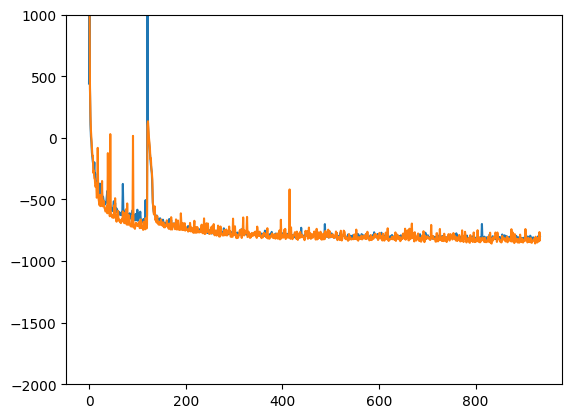

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


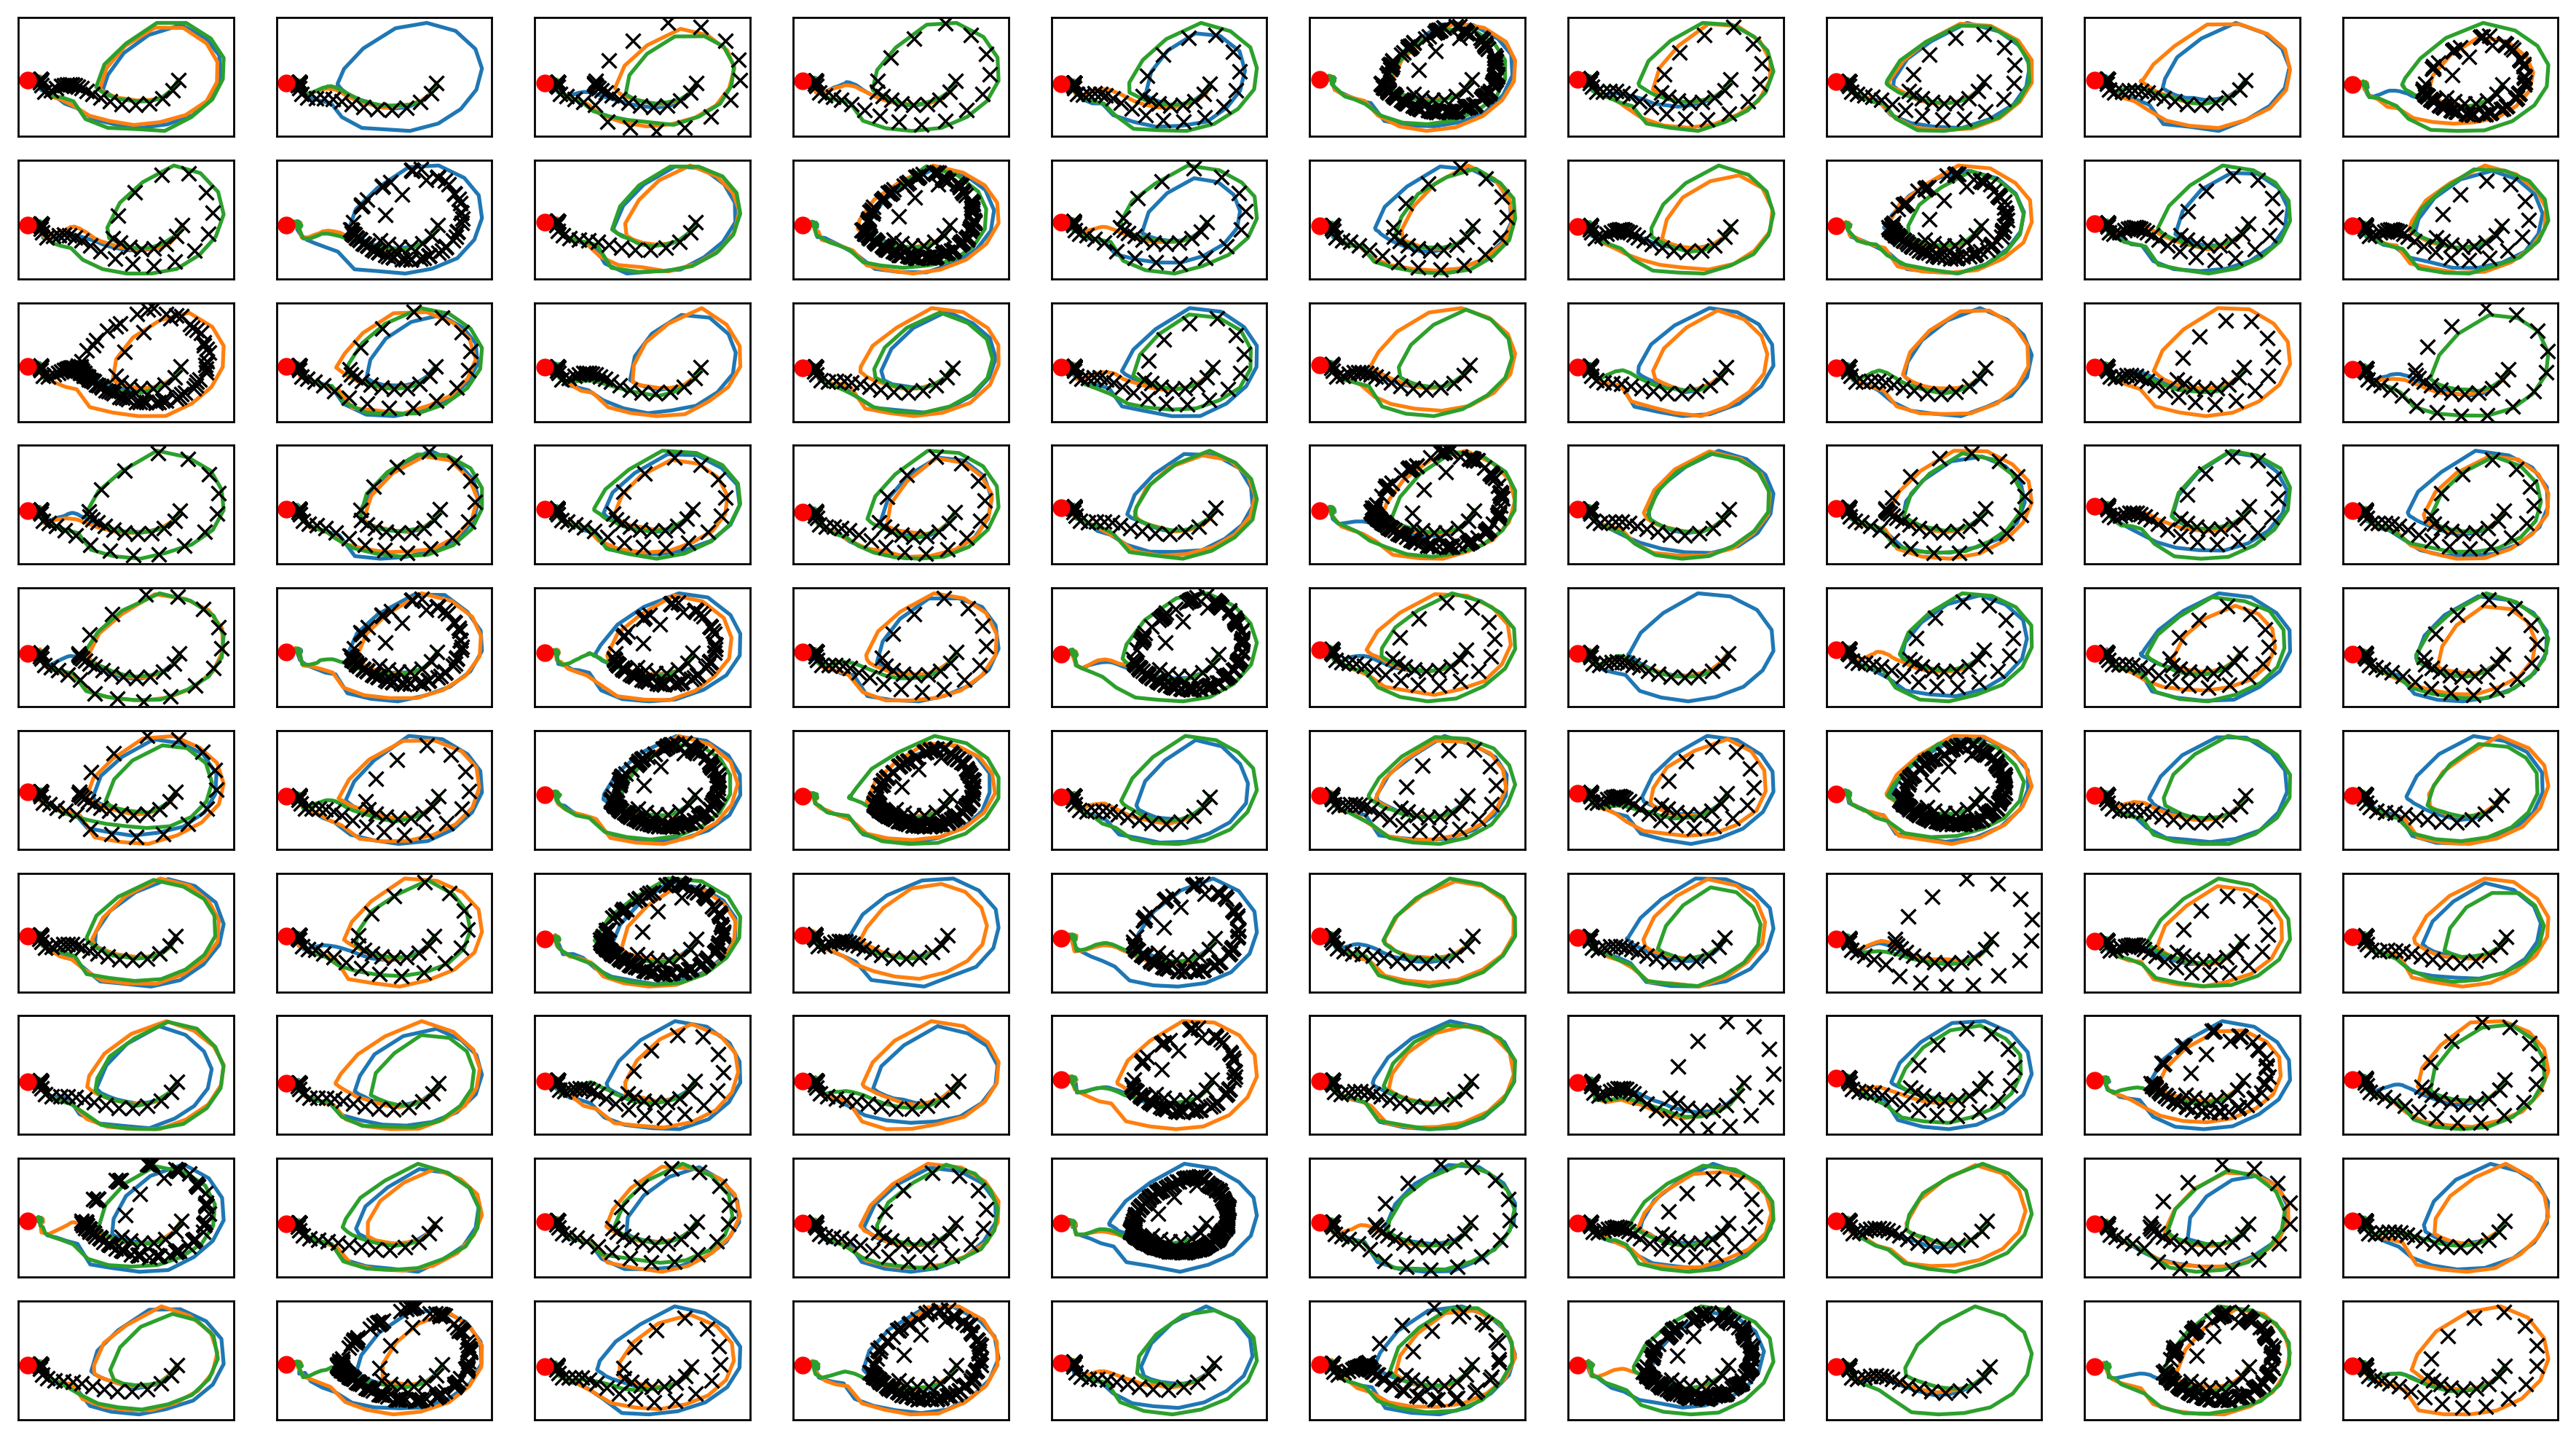

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

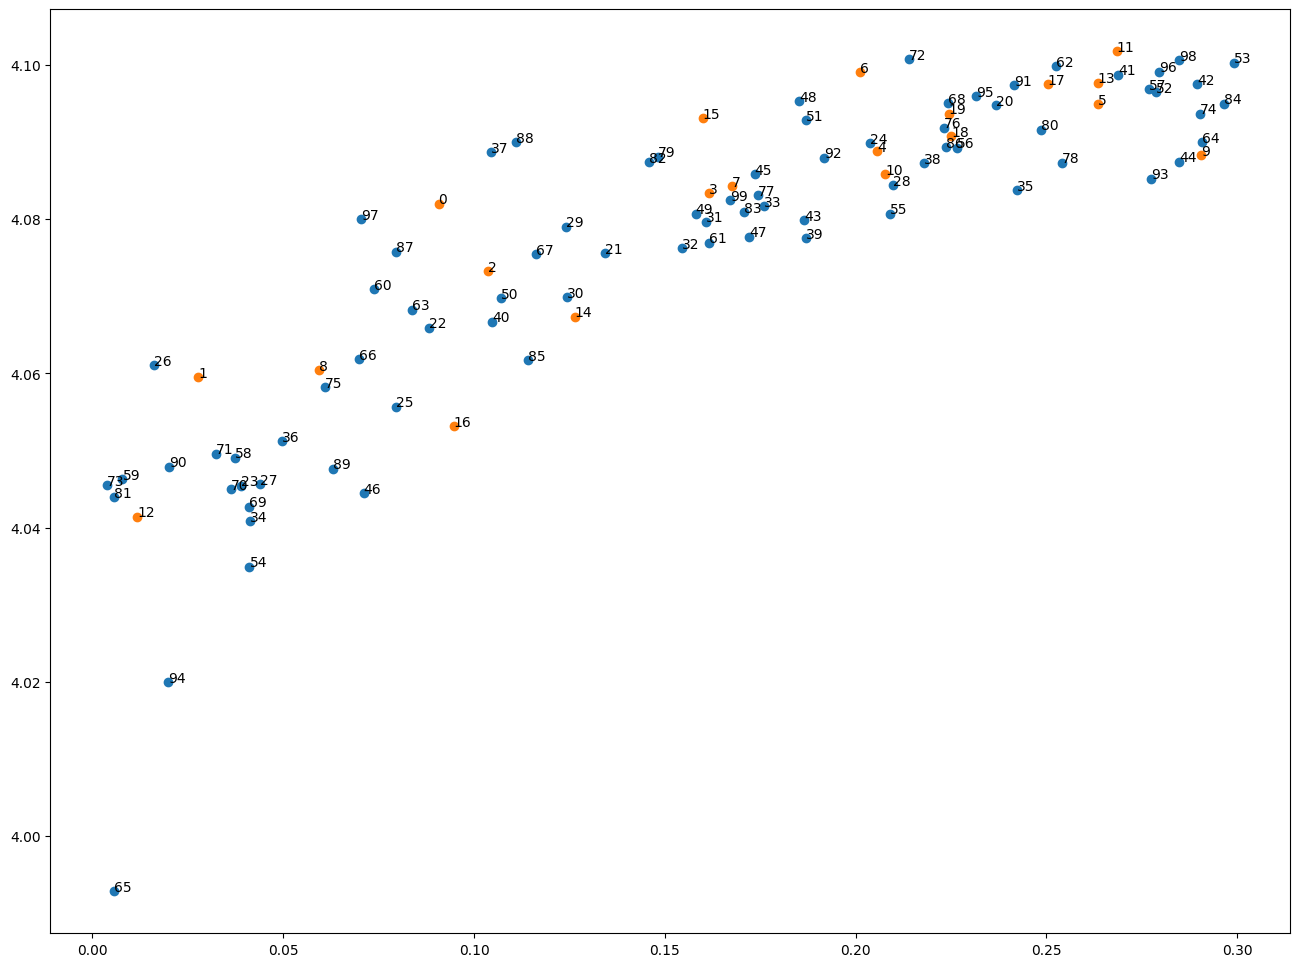

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


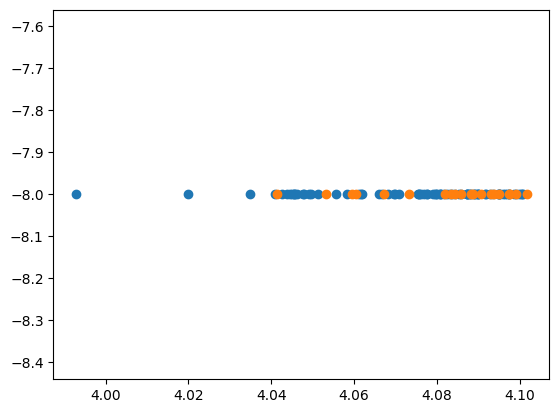

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.76942  validloss 9.23163±0.00000  bestvalidloss 9.23163  last_update 0
train: iter 1  trainloss 7.95699  validloss 8.37086±0.00000  bestvalidloss 8.37086  last_update 0
train: iter 2  trainloss 7.27867  validloss 7.62300±0.00000  bestvalidloss 7.62300  last_update 0
train: iter 3  trainloss 6.67768  validloss 6.97873±0.00000  bestvalidloss 6.97873  last_update 0
train: iter 4  trainloss 6.18787  validloss 6.43572±0.00000  bestvalidloss 6.43572  last_update 0
train: iter 5  trainloss 5.74737  validloss 5.98016±0.00000  bestvalidloss 5.98016  last_update 0
train: iter 6  trainloss 5.37229  validloss 5.57060±0.00000  bestvalidloss 5.57060  last_update 0
train: iter 7  trainloss 5.03726  validloss 5.22702±0.00000  bestvalidloss 5.22702  last_update 0
train: iter 8  trainloss 4.74147  validloss 4.90322±0.00000  bestvalidloss 4.90322  last_update 0
train: iter 9  trainloss 4.49287  validloss 4.61712±0.00000  bestvalidloss 4.61712  last_update 0
train: iter 10  trai

train: iter 87  trainloss 0.44202  validloss 0.46245±0.00000  bestvalidloss 0.46245  last_update 0
train: iter 88  trainloss 0.40097  validloss 0.42148±0.00000  bestvalidloss 0.42148  last_update 0
train: iter 89  trainloss 0.35964  validloss 0.38031±0.00000  bestvalidloss 0.38031  last_update 0
train: iter 90  trainloss 0.31886  validloss 0.33881±0.00000  bestvalidloss 0.33881  last_update 0
train: iter 91  trainloss 0.27804  validloss 0.29793±0.00000  bestvalidloss 0.29793  last_update 0
train: iter 92  trainloss 0.23709  validloss 0.25725±0.00000  bestvalidloss 0.25725  last_update 0
train: iter 93  trainloss 0.19650  validloss 0.21616±0.00000  bestvalidloss 0.21616  last_update 0
train: iter 94  trainloss 0.15613  validloss 0.17502±0.00000  bestvalidloss 0.17502  last_update 0
train: iter 95  trainloss 0.11498  validloss 0.13583±0.00000  bestvalidloss 0.13583  last_update 0
train: iter 96  trainloss 0.07522  validloss 0.09421±0.00000  bestvalidloss 0.09421  last_update 0
train: ite

train: iter 174  trainloss -2.03257  validloss -2.22817±0.00000  bestvalidloss -2.31405  last_update 2
train: iter 175  trainloss -2.06319  validloss -2.24497±0.00000  bestvalidloss -2.31405  last_update 3
train: iter 176  trainloss -2.07827  validloss -2.21365±0.00000  bestvalidloss -2.31405  last_update 4
train: iter 177  trainloss -2.14656  validloss -2.20091±0.00000  bestvalidloss -2.31405  last_update 5
train: iter 178  trainloss -2.18470  validloss -2.30963±0.00000  bestvalidloss -2.31405  last_update 6
train: iter 179  trainloss -2.19518  validloss -2.28582±0.00000  bestvalidloss -2.31405  last_update 7
train: iter 180  trainloss -2.15158  validloss -2.07846±0.00000  bestvalidloss -2.31405  last_update 8
train: iter 181  trainloss -2.14079  validloss -2.15256±0.00000  bestvalidloss -2.31405  last_update 9
train: iter 182  trainloss -2.16223  validloss -2.26008±0.00000  bestvalidloss -2.31405  last_update 10
train: iter 183  trainloss -2.17704  validloss -2.18267±0.00000  bestval

train: iter 256  trainloss -2.11863  validloss -2.12528±0.00000  bestvalidloss -2.42087  last_update 51
train: iter 257  trainloss -2.06704  validloss -2.28689±0.00000  bestvalidloss -2.42087  last_update 52
train: iter 258  trainloss -2.07264  validloss -2.03065±0.00000  bestvalidloss -2.42087  last_update 53
train: iter 259  trainloss -2.12611  validloss -2.23372±0.00000  bestvalidloss -2.42087  last_update 54
train: iter 260  trainloss -2.10773  validloss -2.03354±0.00000  bestvalidloss -2.42087  last_update 55
train: iter 261  trainloss -2.12131  validloss -2.33612±0.00000  bestvalidloss -2.42087  last_update 56
train: iter 262  trainloss -2.19003  validloss -2.28841±0.00000  bestvalidloss -2.42087  last_update 57
train: iter 263  trainloss -2.15164  validloss -2.11318±0.00000  bestvalidloss -2.42087  last_update 58
train: iter 264  trainloss -2.21133  validloss -2.21811±0.00000  bestvalidloss -2.42087  last_update 59
train: iter 265  trainloss -2.07440  validloss -2.27646±0.00000 

train: iter 335  trainloss -2.11802  validloss -2.36374±0.00000  bestvalidloss -2.44436  last_update 29
train: iter 336  trainloss -2.19244  validloss -1.88715±0.00000  bestvalidloss -2.44436  last_update 30
train: iter 337  trainloss -2.19385  validloss -2.19588±0.00000  bestvalidloss -2.44436  last_update 31
train: iter 338  trainloss -1.88411  validloss -2.37600±0.00000  bestvalidloss -2.44436  last_update 32
train: iter 339  trainloss -2.08347  validloss -2.11059±0.00000  bestvalidloss -2.44436  last_update 33
train: iter 340  trainloss -2.18886  validloss -2.32286±0.00000  bestvalidloss -2.44436  last_update 34
train: iter 341  trainloss -2.14906  validloss -2.20152±0.00000  bestvalidloss -2.44436  last_update 35
train: iter 342  trainloss -2.11211  validloss -2.24478±0.00000  bestvalidloss -2.44436  last_update 36
train: iter 343  trainloss -2.22323  validloss -2.36809±0.00000  bestvalidloss -2.44436  last_update 37
train: iter 344  trainloss -2.26229  validloss -2.45281±0.00000 

train: iter 418  trainloss -2.14364  validloss -2.31221±0.00000  bestvalidloss -2.45281  last_update 74
train: iter 419  trainloss -2.12230  validloss -2.14883±0.00000  bestvalidloss -2.45281  last_update 75
train: iter 420  trainloss -2.21197  validloss -2.19157±0.00000  bestvalidloss -2.45281  last_update 76
train: iter 421  trainloss -2.06358  validloss -2.37595±0.00000  bestvalidloss -2.45281  last_update 77
train: iter 422  trainloss -2.10075  validloss -2.10375±0.00000  bestvalidloss -2.45281  last_update 78
train: iter 423  trainloss -2.17294  validloss -2.19138±0.00000  bestvalidloss -2.45281  last_update 79
train: iter 424  trainloss -2.10708  validloss -2.25051±0.00000  bestvalidloss -2.45281  last_update 80
train: iter 425  trainloss -2.12064  validloss -2.19490±0.00000  bestvalidloss -2.45281  last_update 81
train: iter 426  trainloss -2.19110  validloss -2.26507±0.00000  bestvalidloss -2.45281  last_update 82
train: iter 427  trainloss -2.26954  validloss -2.33524±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 4.0759, -7.1214], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.39032  validloss 21.73839±0.00000  bestvalidloss 21.73839  last_update 0
train: iter 1  trainloss 7.13100  validloss 11.09447±0.00000  bestvalidloss 11.09447  last_update 0
train: iter 2  trainloss 3.88497  validloss 5.25056±0.00000  bestvalidloss 5.25056  last_update 0
train: iter 3  trainloss 2.84547  validloss 3.37219±0.00000  bestvalidloss 3.37219  last_update 0
train: iter 4  trainloss 2.54739  validloss 2.73689±0.00000  bestvalidloss 2.73689  last_update 0
train: iter 5  trainloss 2.45665  validloss 2.50580±0.00000  bestvalidloss 2.50580  last_update 0
train: iter 6  trainloss 2.40749  validloss 2.42319±0.00000  bestvalidloss 2.42319  last_update 0
train: iter 7  trainloss 2.39865  validloss 2.38672±0.00000  bestvalidloss 2.38672  last_update 0
train: iter 8  trainloss 2.36815  validloss 2.36211±0.00000  bestvalidloss 2.36211  last_update 0
train: iter 9  trainloss 2.38809  validloss 2.32692±0.00000  bestvalidloss 2.32692  last_update 0
train: iter 10 

train: iter 83  trainloss 1.91821  validloss 1.59317±0.00000  bestvalidloss 1.55068  last_update 8
train: iter 84  trainloss 1.90638  validloss 1.55626±0.00000  bestvalidloss 1.55068  last_update 9
train: iter 85  trainloss 1.90759  validloss 1.55488±0.00000  bestvalidloss 1.55068  last_update 10
train: iter 86  trainloss 1.91322  validloss 1.55408±0.00000  bestvalidloss 1.55068  last_update 11
train: iter 87  trainloss 1.91633  validloss 1.55196±0.00000  bestvalidloss 1.55068  last_update 12
train: iter 88  trainloss 1.89543  validloss 1.54032±0.00000  bestvalidloss 1.54032  last_update 0
train: iter 89  trainloss 1.91253  validloss 1.63050±0.00000  bestvalidloss 1.54032  last_update 1
train: iter 90  trainloss 1.90435  validloss 1.61897±0.00000  bestvalidloss 1.54032  last_update 2
train: iter 91  trainloss 1.91606  validloss 1.60624±0.00000  bestvalidloss 1.54032  last_update 3
train: iter 92  trainloss 1.91764  validloss 1.61177±0.00000  bestvalidloss 1.54032  last_update 4
train: 

train: iter 166  trainloss 1.90815  validloss 1.56076±0.00000  bestvalidloss 1.51522  last_update 71
train: iter 167  trainloss 1.89430  validloss 1.53523±0.00000  bestvalidloss 1.51522  last_update 72
train: iter 168  trainloss 1.90113  validloss 1.57778±0.00000  bestvalidloss 1.51522  last_update 73
train: iter 169  trainloss 1.90417  validloss 1.64532±0.00000  bestvalidloss 1.51522  last_update 74
train: iter 170  trainloss 1.89390  validloss 1.57191±0.00000  bestvalidloss 1.51522  last_update 75
train: iter 171  trainloss 1.88218  validloss 1.53943±0.00000  bestvalidloss 1.51522  last_update 76
train: iter 172  trainloss 1.89787  validloss 1.60204±0.00000  bestvalidloss 1.51522  last_update 77
train: iter 173  trainloss 1.90116  validloss 1.67097±0.00000  bestvalidloss 1.51522  last_update 78
train: iter 174  trainloss 1.87853  validloss 1.57376±0.00000  bestvalidloss 1.51522  last_update 79
train: iter 175  trainloss 1.87685  validloss 1.62920±0.00000  bestvalidloss 1.51522  last_

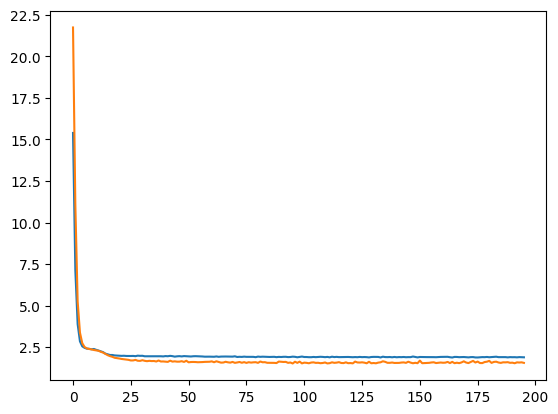

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-3.0454)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-3.9581)


In [21]:
print(vi.h_min_tilde)

-6.1619263


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.5939671037107874
tensor([1.0480])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

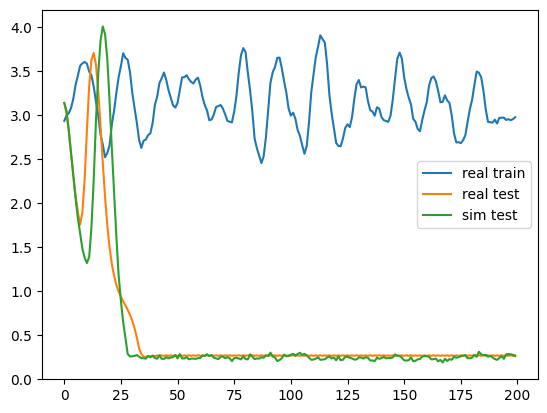

encoder [ 4.093695 -8.      ]
initial_belief tensor([ 4.0759, -7.1214])
real train tensor([ 4.0903, -8.0084])
real test tensor([ 4.1058, -8.0039])
sim tensor([ 4.0876, -8.0059])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


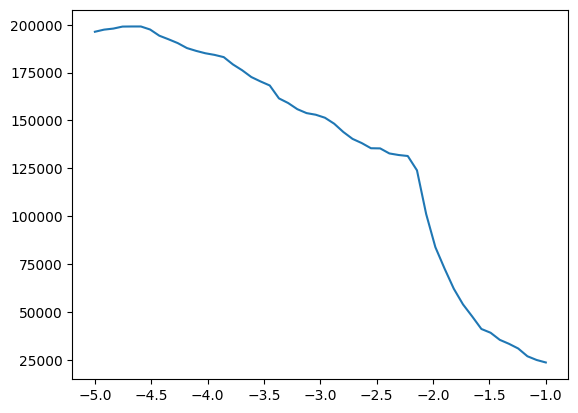

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.3433798202094471
tensor([-0.5532])
